In [548]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from SALib.sample import sobol
import sys

In [549]:
sys.path.append('../integrated_market_model/')
from market import IntegratedMarketModel

In [550]:
n_consumers = 100
n_firms = 10 
T = 100
n_chars = 2


model = IntegratedMarketModel(n_firms, n_consumers, n_chars, T,
                              beta1=2.,
                              beta2=1.,
                              beta3=1.5,
                               x1_min=5., x1_max=6.,
                               x2_min=1., x2_max=2.)
print(model)

Market with 10 firms and 100 consumers.


In [551]:
try1 = np.random.uniform(10, 1, 3)
print(try1)

[4.28845797 5.36537791 6.46780231]


In [552]:
v_p = np.random.normal(0, 1, (n_consumers,T))
# p = np.ones((n_firms, T))+10
p = np.random.uniform(7, 8, (n_firms, T))
shares = np.zeros((n_firms, T))
for t in range(0,T):
    share_t, prob_t, indirect_u_t = model.compute_share(v_p[:,t], p[:,t], e=0)
    shares[:,t] = share_t

print(shares)

[[0.06324226 0.06206345 0.07033749 0.05742093 0.06112267 0.057031
  0.05982695 0.06297343 0.07070882 0.06467991 0.06198706 0.06035844
  0.06463719 0.06029991 0.0659364  0.07020354 0.06820539 0.05901407
  0.07417704 0.06193095 0.08830501 0.06412826 0.06550272 0.06157145
  0.0650394  0.06477243 0.06231072 0.07251362 0.0694008  0.07064759
  0.06934045 0.0720841  0.07045453 0.06617991 0.06672037 0.06454746
  0.07425989 0.07054249 0.07310106 0.06358658 0.06476828 0.06309392
  0.06227086 0.0571504  0.05415179 0.06420084 0.06133123 0.06297525
  0.0620739  0.07840487 0.05654702 0.06595284 0.07483365 0.05714383
  0.07517653 0.07195104 0.07592676 0.06373677 0.0656765  0.06602833
  0.06243951 0.0602375  0.06864531 0.06794944 0.06775248 0.05797186
  0.05976919 0.07248786 0.0618732  0.06449488 0.07598231 0.07082874
  0.064136   0.07802459 0.06741641 0.06367167 0.07990778 0.0511702
  0.079582   0.05818024 0.06764689 0.06766755 0.07203322 0.0724618
  0.06435717 0.05878834 0.07467633 0.06965164 0.0603

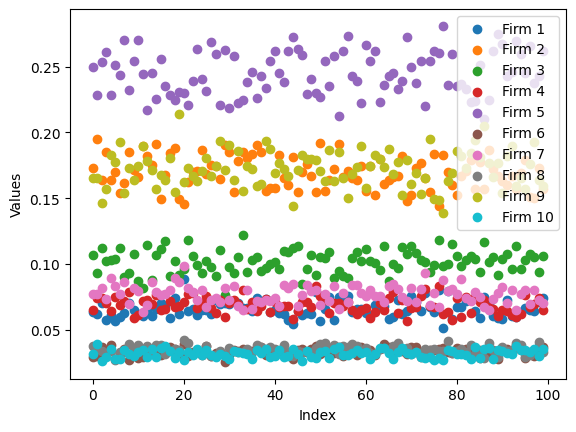

In [553]:
# Get the number of rows and columns
num_rows, num_cols = shares.shape

# Plot the scatter plot for each row using the default color cycle
for i in range(num_rows):
    row = shares[i]
    plt.scatter(range(num_cols), row, label=f'Firm {i+1}')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

# Show the plot
plt.show()